# Setup and Context

<img src="https://i.imgur.com/gugIA5r.png" width=700>

### Introduction

Dr Ignaz Semmelweis was a Hungarian physician born in 1818 who worked in the Vienna General Hospital. In the past people thought of illness as caused by "bad air" or evil spirits. But in the 1800s Doctors started looking more at anatomy, doing autopsies and started making arguments based on data. Dr Semmelweis suspected that something was going wrong with the procedures at Vienna General Hospital. Semmelweis wanted to figure out why so many women in maternity wards were dying from childbed fever (i.e., [puerperal fever](https://en.wikipedia.org/wiki/Postpartum_infections)).

<img src=https://i.imgur.com/lSyNUwR.png width=700>

Today you will become Dr Semmelweis. This is your office 👆. You will step into Dr Semmelweis' shoes and analyse the same data collected from 1841 to 1849.

### The Data Source

Dr Semmelweis published his research in 1861. I found the scanned pages of the [full text with the original tables in German](http://www.deutschestextarchiv.de/book/show/semmelweis_kindbettfieber_1861), but an excellent [English translation can be found here](http://graphics8.nytimes.com/images/blogs/freakonomics/pdf/the%20etiology,%20concept%20and%20prophylaxis%20of%20childbed%20fever.pdf).

<img src=https://i.imgur.com/6HfLtaC.png width=500>

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server.

In [ ]:
 %pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 70.9 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


### Import Statements

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt


### Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format


# Create locators for ticks on the time axis
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Read the Data

In [ ]:
df_yearly = pd.read_csv('annual_deaths_by_clinic.csv')

# parse_dates avoids DateTime conversion later

df_monthly = pd.read_csv('monthly_deaths.csv',
                      parse_dates=['date']) #what is parse_date here.

# Preliminary Data Exploration

**Challenge**: Check out these two DataFrames ☝️.
* What is the shape of df_yearly and df_monthly? How many rows and columns?
* What are the column names?
* Which years are included in the dataset?
* Are there any NaN values or duplicates?
* What were the average number of births that took place per month?
* What were the average number of deaths that took place per month?

In [ ]:
print(f"DF_yearly has {df_yearly.shape[0]} row and {df_yearly.shape[1]} columns")
print(f'df_monthly has {df_monthly.shape[0]} row and  {df_monthly.shape[1]} columns')

DF_yearly has 12 row and 4 columns
df_monthly has 98 row and  3 columns


In [ ]:
print(df_yearly.columns)
df_monthly.columns

Index(['year', 'births', 'deaths', 'clinic'], dtype='object')


Index(['date', 'births', 'deaths'], dtype='object')

### Check for Nan Values and Duplicates

In [ ]:
print(f"There are {df_yearly.isna().values.sum()} Nan value in df_yearly and {df_monthly.isna().values.sum()} NaN values in df_monthly")
print(f"There are {df_yearly.duplicated().values.sum()} duplicate value in df_yealy and {df_monthly.duplicated().values.sum()} duplicate value in df_monthly")

There are 0 Nan value in df_yearly and 0 NaN values in df_monthly
There are 0 duplicate value in df_yealy and 0 duplicate value in df_monthly


In [ ]:
print(df_yearly.duplicated().values.any())
df_monthly.duplicated().values.any()

False


False

### Descriptive Statistics

What were the average number of births that took place per month?<br>
What were the average number of deaths that took place per month?

In [ ]:
print(df_monthly.describe())
df_yearly.describe()

       births  deaths
count   98.00   98.00
mean   267.00   22.47
std     41.77   18.14
min    190.00    0.00
25%    242.50    8.00
50%    264.00   16.50
75%    292.75   36.75
max    406.00   75.00


,year,births,deaths
count,12.00,12.00,12.00
mean,"1,843.50","3,152.75",223.33
std,1.78,449.08,145.38
min,"1,841.00","2,442.00",66.00
25%,"1,842.00","2,901.75",100.25
50%,"1,843.50","3,108.50",219.50
75%,"1,845.00","3,338.25",263.50
max,"1,846.00","4,010.00",518.00


In [ ]:
df_monthly.sort_values('date')

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2
...,...,...,...
93,1848-11-01,310,9
94,1848-12-01,373,5
95,1849-01-01,403,9
96,1849-02-01,389,12


In [ ]:
df_yearly.sort_values('year').tail()

,year,births,deaths,clinic
9,1844,2956,68,clinic 2
4,1845,3492,241,clinic 1
10,1845,3241,66,clinic 2
5,1846,4010,459,clinic 1
11,1846,3754,105,clinic 2


### Percentage of Women Dying in Childbirth

**Challenge**: How dangerous was childbirth in the 1840s in Vienna?

* Using the annual data, calculate the percentage of women giving birth who died throughout the 1840s at the hospital.


In comparison, the United States recorded 18.5 maternal deaths per 100,000 or 0.018% in 2013 [(source).](
https://en.wikipedia.org/wiki/Maternal_death#:~:text=The%20US%20has%20the%20%22highest,17.8%20per%20100%2C000%20in%202009)

In [ ]:
prob=df_yearly.deaths.sum()/ df_monthly.births.sum()*100
print(prob)
print(f"Chances of dying in 1840s is {prob:.4} %")

10.242299166857755
Chances of dying in 1840s is 10.24 %


# Visualise the Total Number of Births 🤱 and Deaths 💀 over Time

### Plot the Monthly Data on Twin Axes

**Challenge**: Create a [Matplotlib chart](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.plot.html) with twin y-axes. It should look something like this:

<img src=https://i.imgur.com/F9DOJxx.png width=700>

* Format the x-axis using locators for the years and months (Hint: we did this in the Google Trends notebook)
* Set the range on the x-axis so that the chart lines touch the y-axes
* Add gridlines
* Use `skyblue` and `crimson` for the line colours
* Use a dashed line style for the number of deaths
* Change the line thickness to 3 and 2 for the births and deaths respectively.
* Do you notice anything in the late 1840s?

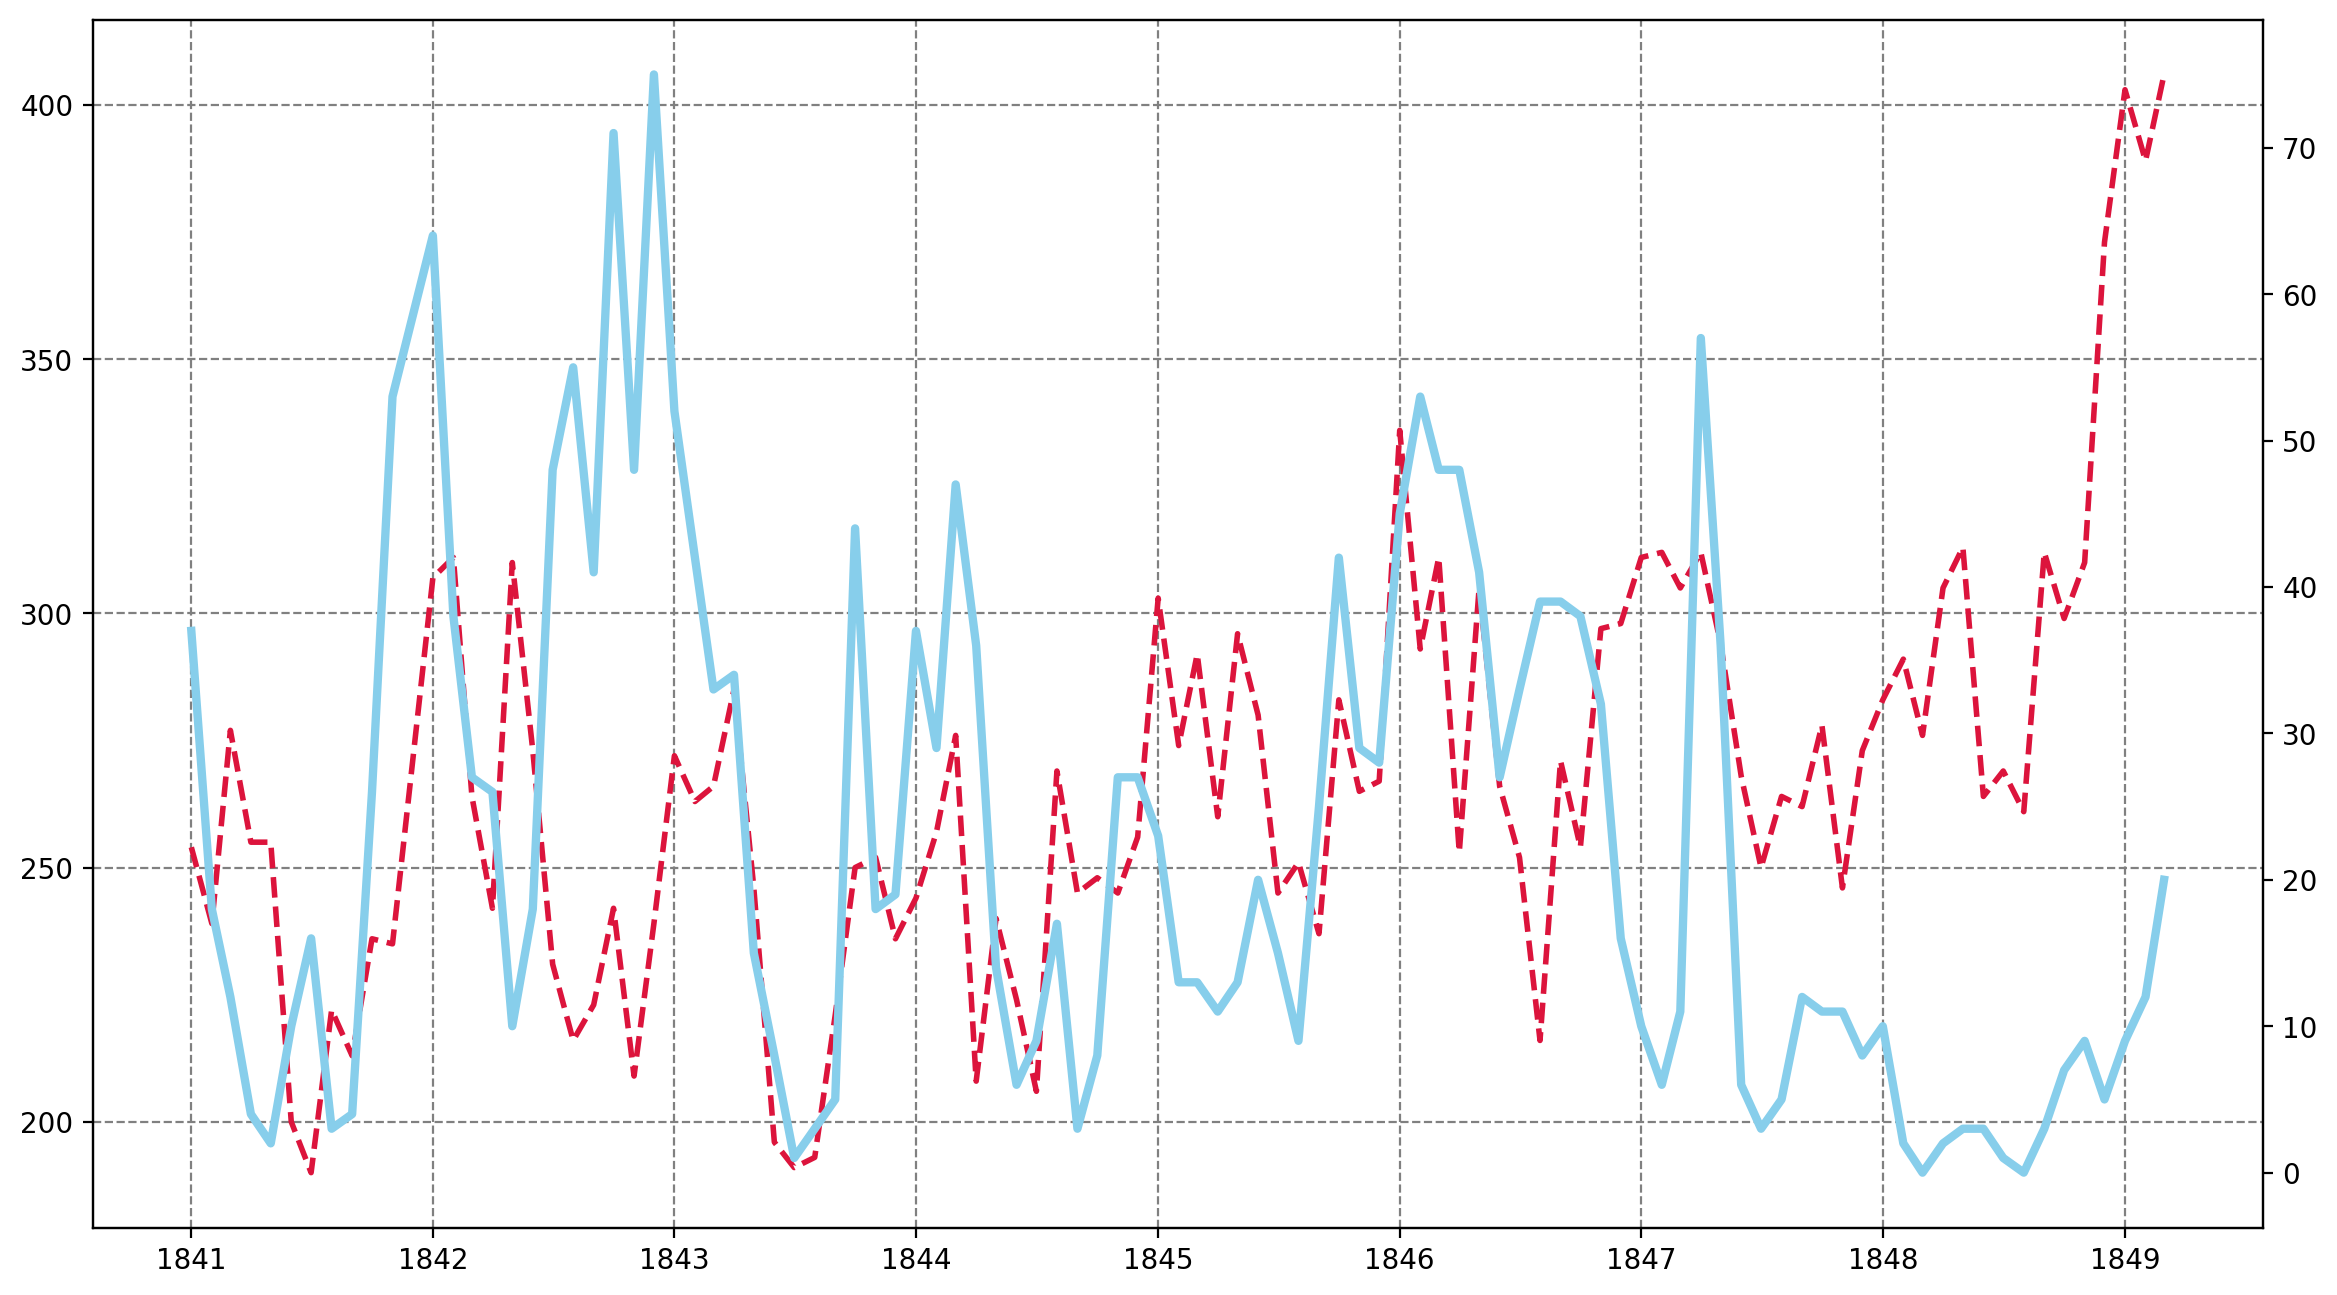

In [ ]:
plt.figure(figsize=(14,8),dpi=200)

ax1=plt.gca()
ax2=ax1.twinx()

#set grid lines
ax1.grid(color='grey',linestyle='--')

ax1.plot(df_monthly.date,
         df_monthly.births,
         color='crimson',
         linewidth=2,
         linestyle='dashed'
         )

ax2.plot(df_monthly.date,
         df_monthly.deaths,
         linewidth=3,
         color='skyblue'
         )

plt.show()

###  Here we have use **mdates** for creating locator for the year and month.


In [ ]:
import matplotlib.dates as mdates # What is this for, why we need it import.

In [ ]:
month=mdates.MonthLocator()
year=mdates.YearLocator()
year_fmt=mdates.DateFormatter('Y') #Do search year Dateformatter.

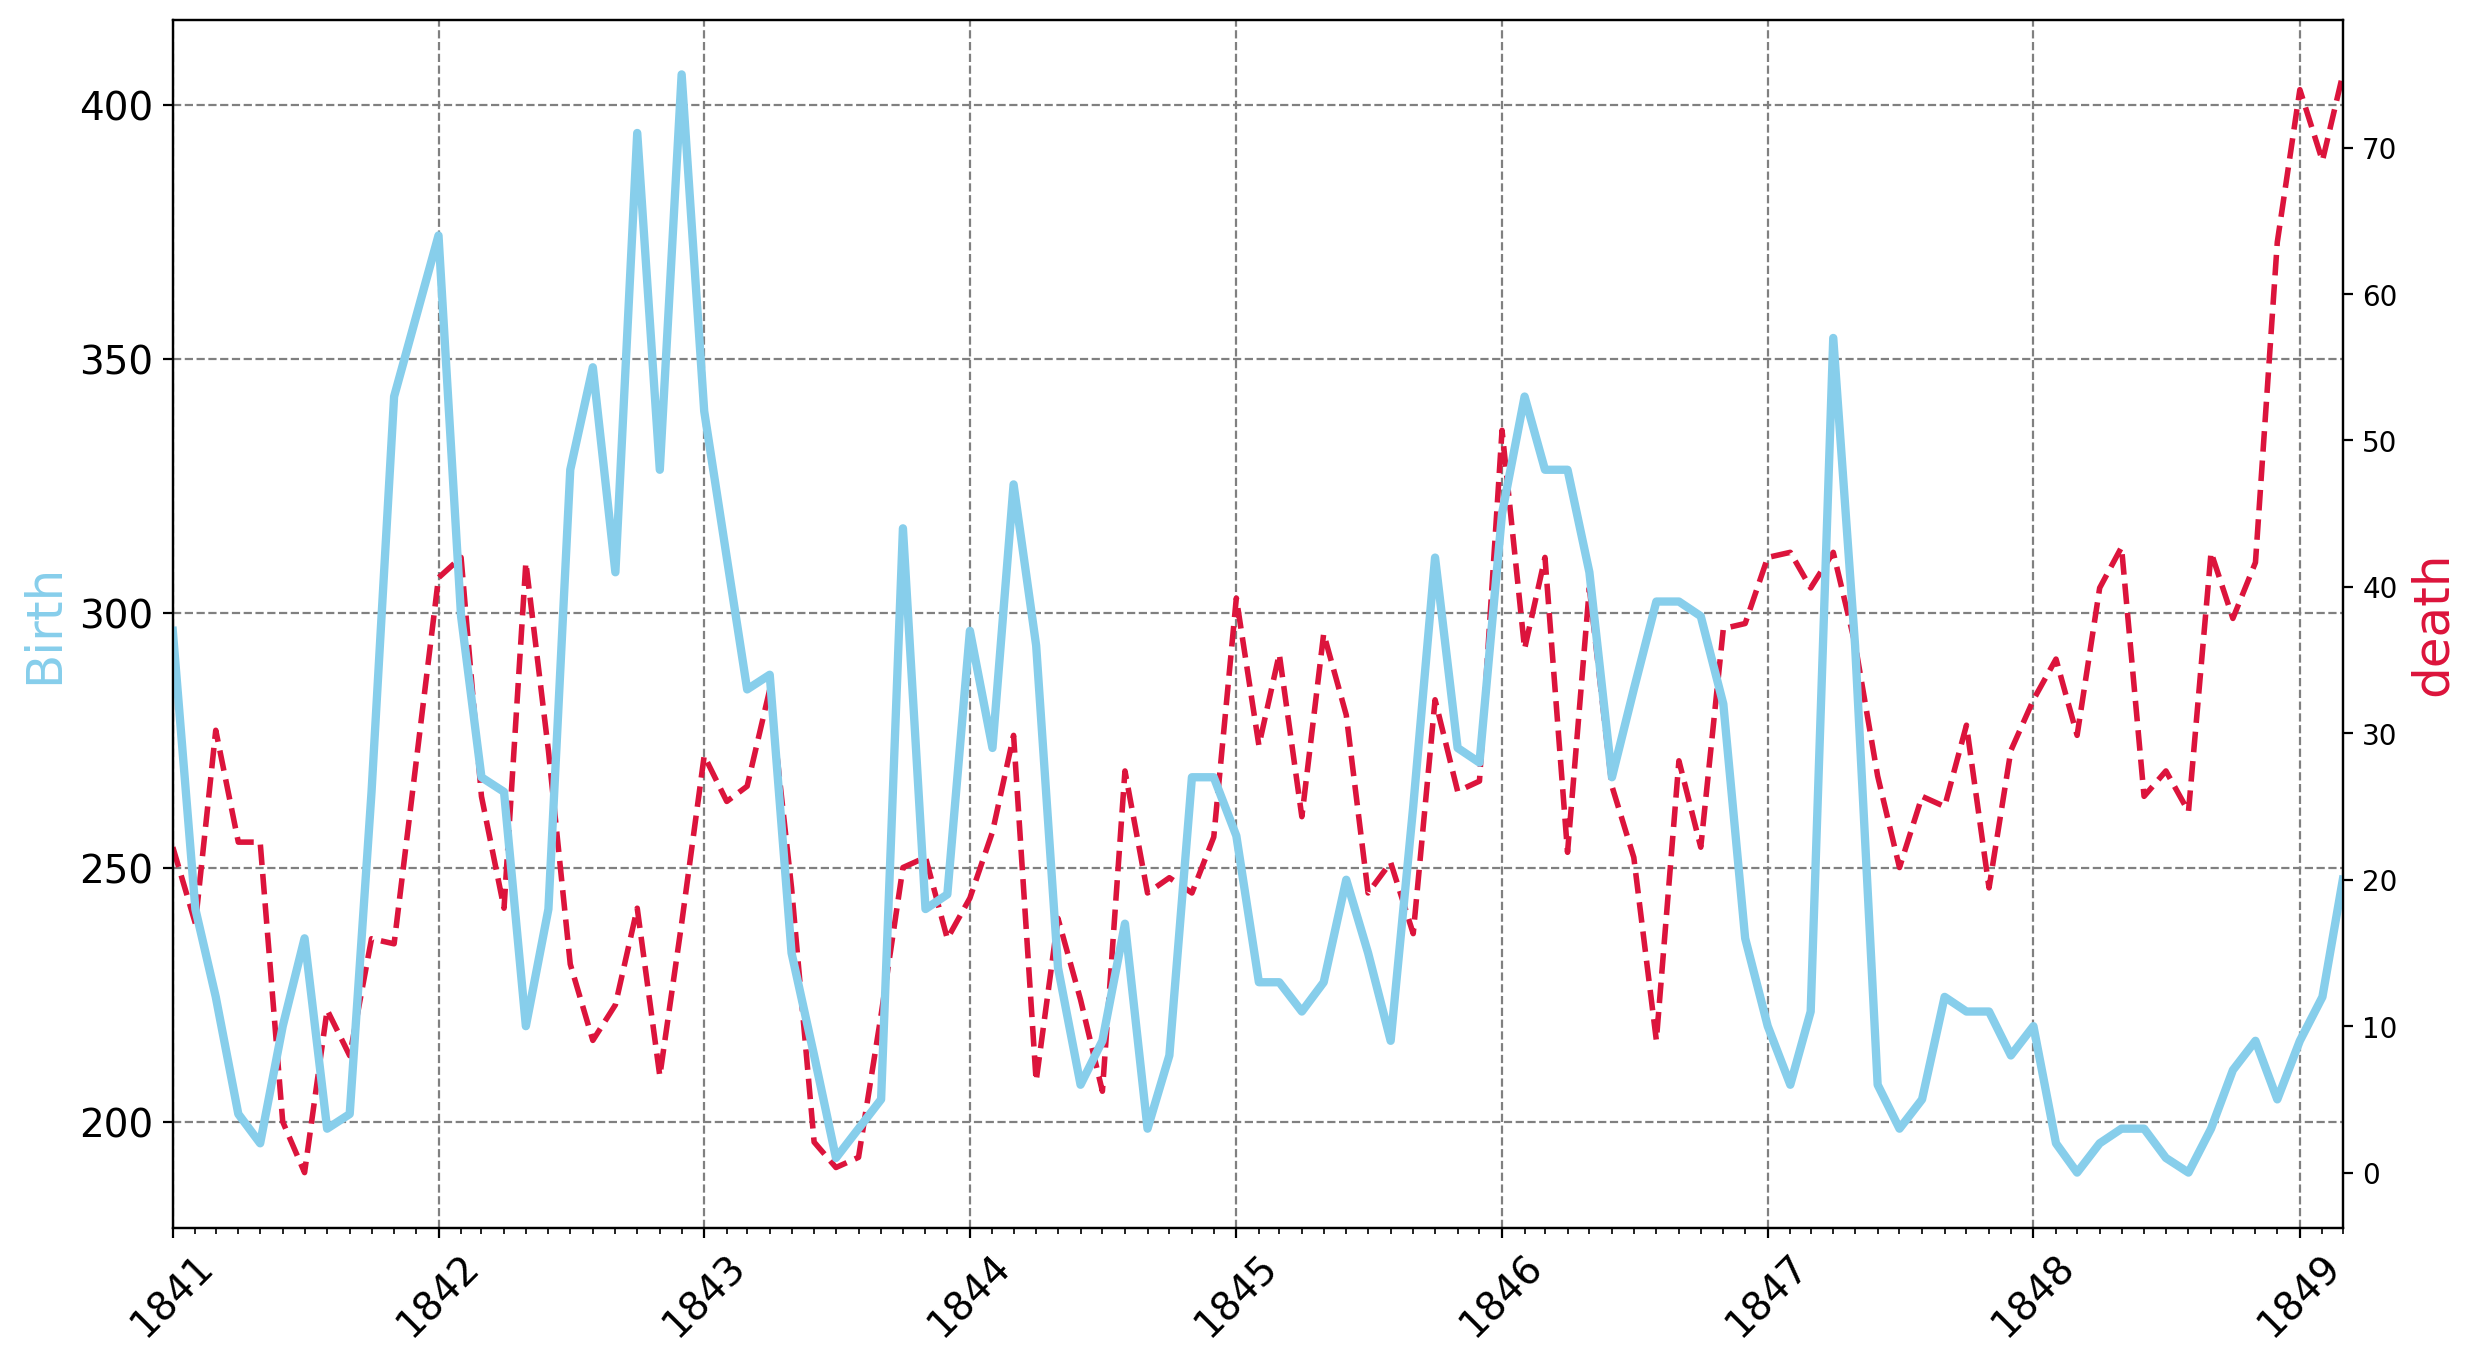

In [ ]:
plt.figure(figsize=(14,8),dpi=200)
plt.xticks(fontsize=14,rotation=45)
plt.yticks(fontsize=14)


ax1=plt.gca()
ax2=ax1.twinx()


# Creating label
ax1.set_ylabel('Birth',color='skyblue',fontsize=18)
ax2.set_ylabel('death',color='crimson',fontsize=18)



# Putiing grid line on plot
ax1.grid(color='grey',linestyle='--')


# Use locator
ax1.set_xlim(df_monthly.date.min(),df_monthly.date.max())
ax1.xaxis.set_major_locator(year)
ax1.xaxis.set_major_formatter(year_fmt)
ax1.xaxis.set_minor_locator(month)


ax1.plot(df_monthly.date,
         df_monthly.births,
         color='crimson',
         linewidth=2,
         linestyle='dashed'
         )


ax2.plot(df_monthly.date,
         df_monthly.deaths,
         linewidth=3,
         color='skyblue'
         )


plt.show()

# The Yearly Data Split by Clinic

Now let's look at the annual data instead.

**Challenge**: Use plotly to create line charts of the births and deaths of the two different clinics at the Vienna General Hospital.
* Which clinic is bigger or more busy judging by the number of births?
* Has the hospital had more patients over time?
* What was the highest number of deaths recorded in clinic 1 and clinic 2?

In [ ]:
plt.figure(figsize=(10,8),dpi=200)


fig=px.line(df_yearly,
            x=df_yearly.year,
            y=df_yearly.births,
            color=df_yearly.clinic,
            title='Total Yearly birth by Clinic'
            )


fig.show()

<Figure size 2000x1600 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,8),dpi=200)

fig=px.line(df_yearly,
            x=df_yearly.year,
            y=df_yearly.deaths,
            color=df_yearly.clinic,
            title='Total Yearly deaths by Clinic'
            )
fig.show()

<Figure size 2000x1600 with 0 Axes>

### Calculate the Proportion of Deaths at Each Clinic

**Challenge**: Calculate the proportion of maternal deaths per clinic. That way we can compare like with like.
* Work out the percentage of deaths for each row in the `df_yearly` DataFrame by adding a column called "pct_deaths".
* Calculate the average maternal death rate for clinic 1 and clinic 2 (i.e., the total number of deaths per the total number of births).
* Create another plotly line chart to see how the percentage varies year over year with the two different clinics.
* Which clinic has a higher proportion of deaths?
* What is the highest monthly death rate in clinic 1 compared to clinic 2?

In [ ]:
df_yearly

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


In [ ]:
death_vs_birth=df_yearly.deaths/ df_yearly.births
df_yearly['pct_death']=death_vs_birth*100
df_yearly.head()

,year,births,deaths,clinic,pct_death
0,1841,3036,237,clinic 1,7.81
1,1842,3287,518,clinic 1,15.76
2,1843,3060,274,clinic 1,8.95
3,1844,3157,260,clinic 1,8.24
4,1845,3492,241,clinic 1,6.90


In [ ]:
clinic_1 =df_yearly[df_yearly.clinic=='clinic 1']
avg_c1 = clinic_1.deaths.sum()/clinic_1.births.sum()*100
print(f"The avg death rate  in clinic 1 is:{round(avg_c1,2)}%  {avg_c1:.3}%")

The avg death rate  in clinic 1 is:9.92%  9.92%


In [ ]:
clinic_2=df_yearly[df_yearly.clinic=='clinic 2']
avg_c2=clinic_2.deaths.sum()/clinic_2.births.sum()*100
print(f"The avg death rate in clinic 2 is:{avg_c2:.3}")

The avg death rate in clinic 2 is:3.88


### Plotting the Proportion of Yearly Deaths by Clinic

In [ ]:
plt.figure(figsize=(10,8),dpi=200)\

fig=px.line(df_yearly,
            x='year',
            y='pct_death',
            color='clinic'
            )

fig.show()

<Figure size 2000x1600 with 0 Axes>

# The Effect of Handwashing

Dr Semmelweis made handwashing obligatory in the summer of 1947. In fact, he ordered people to wash their hands with clorine (instead of water).

In [ ]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')

**Challenge**:
* Add a column called "pct_deaths" to `df_monthly` that has the percentage of deaths per birth for each row.
* Create two subsets from the `df_monthly` data: before and after Dr Semmelweis ordered washing hand.
* Calculate the average death rate prior to June 1947.
* Calculate the average death rate after June 1947.

In [ ]:
mn_death_rate=df_monthly.deaths/df_monthly.births

In [ ]:
df_monthly['pct_deaths']=mn_death_rate
df_monthly

,date,births,deaths,pct_deaths
0,1841-01-01,254,37,0.15
1,1841-02-01,239,18,0.08
2,1841-03-01,277,12,0.04
3,1841-04-01,255,4,0.02
4,1841-05-01,255,2,0.01
...,...,...,...,...
93,1848-11-01,310,9,0.03
94,1848-12-01,373,5,0.01
95,1849-01-01,403,9,0.02
96,1849-02-01,389,12,0.03


In [ ]:
df_monthly_bf=df_monthly[df_monthly.date<handwashing_start]
df_monthly_bf

,date,births,deaths,pct_deaths
0,1841-01-01,254,37,0.15
1,1841-02-01,239,18,0.08
2,1841-03-01,277,12,0.04
3,1841-04-01,255,4,0.02
4,1841-05-01,255,2,0.01
...,...,...,...,...
71,1847-01-01,311,10,0.03
72,1847-02-01,312,6,0.02
73,1847-03-01,305,11,0.04
74,1847-04-01,312,57,0.18


In [ ]:
df_monthly_af=df_monthly[df_monthly.date>=handwashing_start]
df_monthly_af

,date,births,deaths,pct_deaths
76,1847-06-01,268,6,0.02
77,1847-07-01,250,3,0.01
78,1847-08-01,264,5,0.02
79,1847-09-01,262,12,0.05
80,1847-10-01,278,11,0.04
81,1847-11-01,246,11,0.04
82,1847-12-01,273,8,0.03
83,1848-01-01,283,10,0.04
84,1848-02-01,291,2,0.01
85,1848-03-01,276,0,0.00


In [ ]:
bw_rate=df_monthly_bf.deaths.sum()/df_monthly_bf.births.sum()*100
aw_rate=df_monthly_af.deaths.sum()/df_monthly_af.births.sum()*100
print(f"The avg death rate before 1847 is:{bw_rate:.3}")
print(f"The avg death rate after 1847 is: {aw_rate:.3}")

The avg death rate before 1847 is:10.5
The avg death rate after 1847 is: 2.15


### Calculate a Rolling Average of the Death Rate

**Challenge**: Create a DataFrame that has the 6 month rolling average death rate prior to mandatory handwashing.

*Hint*: You'll need to set the dates as the index in order to avoid the date column being dropped during the calculation.

In [ ]:
# Here I am setting date column as an index which is need of a calculation.
roll_df=df_monthly_bf.set_index('date')
roll_df.sample(3)

,births,deaths,pct_deaths
date,,,
1841-09-01,213,4,0.02
1845-01-01,303,23,0.08
1847-02-01,312,6,0.02


In [ ]:
roll_df=roll_df.rolling(window=6).mean()

### Highlighting Subsections of a Line Chart

**Challenge**: Copy-paste and then modify the Matplotlib chart from before to plot the monthly death rates (instead of the total number of births and deaths). The chart should look something like this:

<img src=https://i.imgur.com/X6TQe0R.png width=500>

* Add 3 seperate lines to the plot: the death rate before handwashing, after handwashing, and the 6-month moving average before handwashing.
* Show the monthly death rate before handwashing as a thin dashed black line.
* Show the moving average as a thicker, crimon line.
* Show the rate after handwashing as a skyblue line with round markers.
* Look at the [code snippet in the documentation to see how you can add a legend](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html) to the chart.

In [ ]:
year=mdates.YearLocator()
month=mdates.MonthLocator()
year_fmt=mdates.DateFormatter('Y')

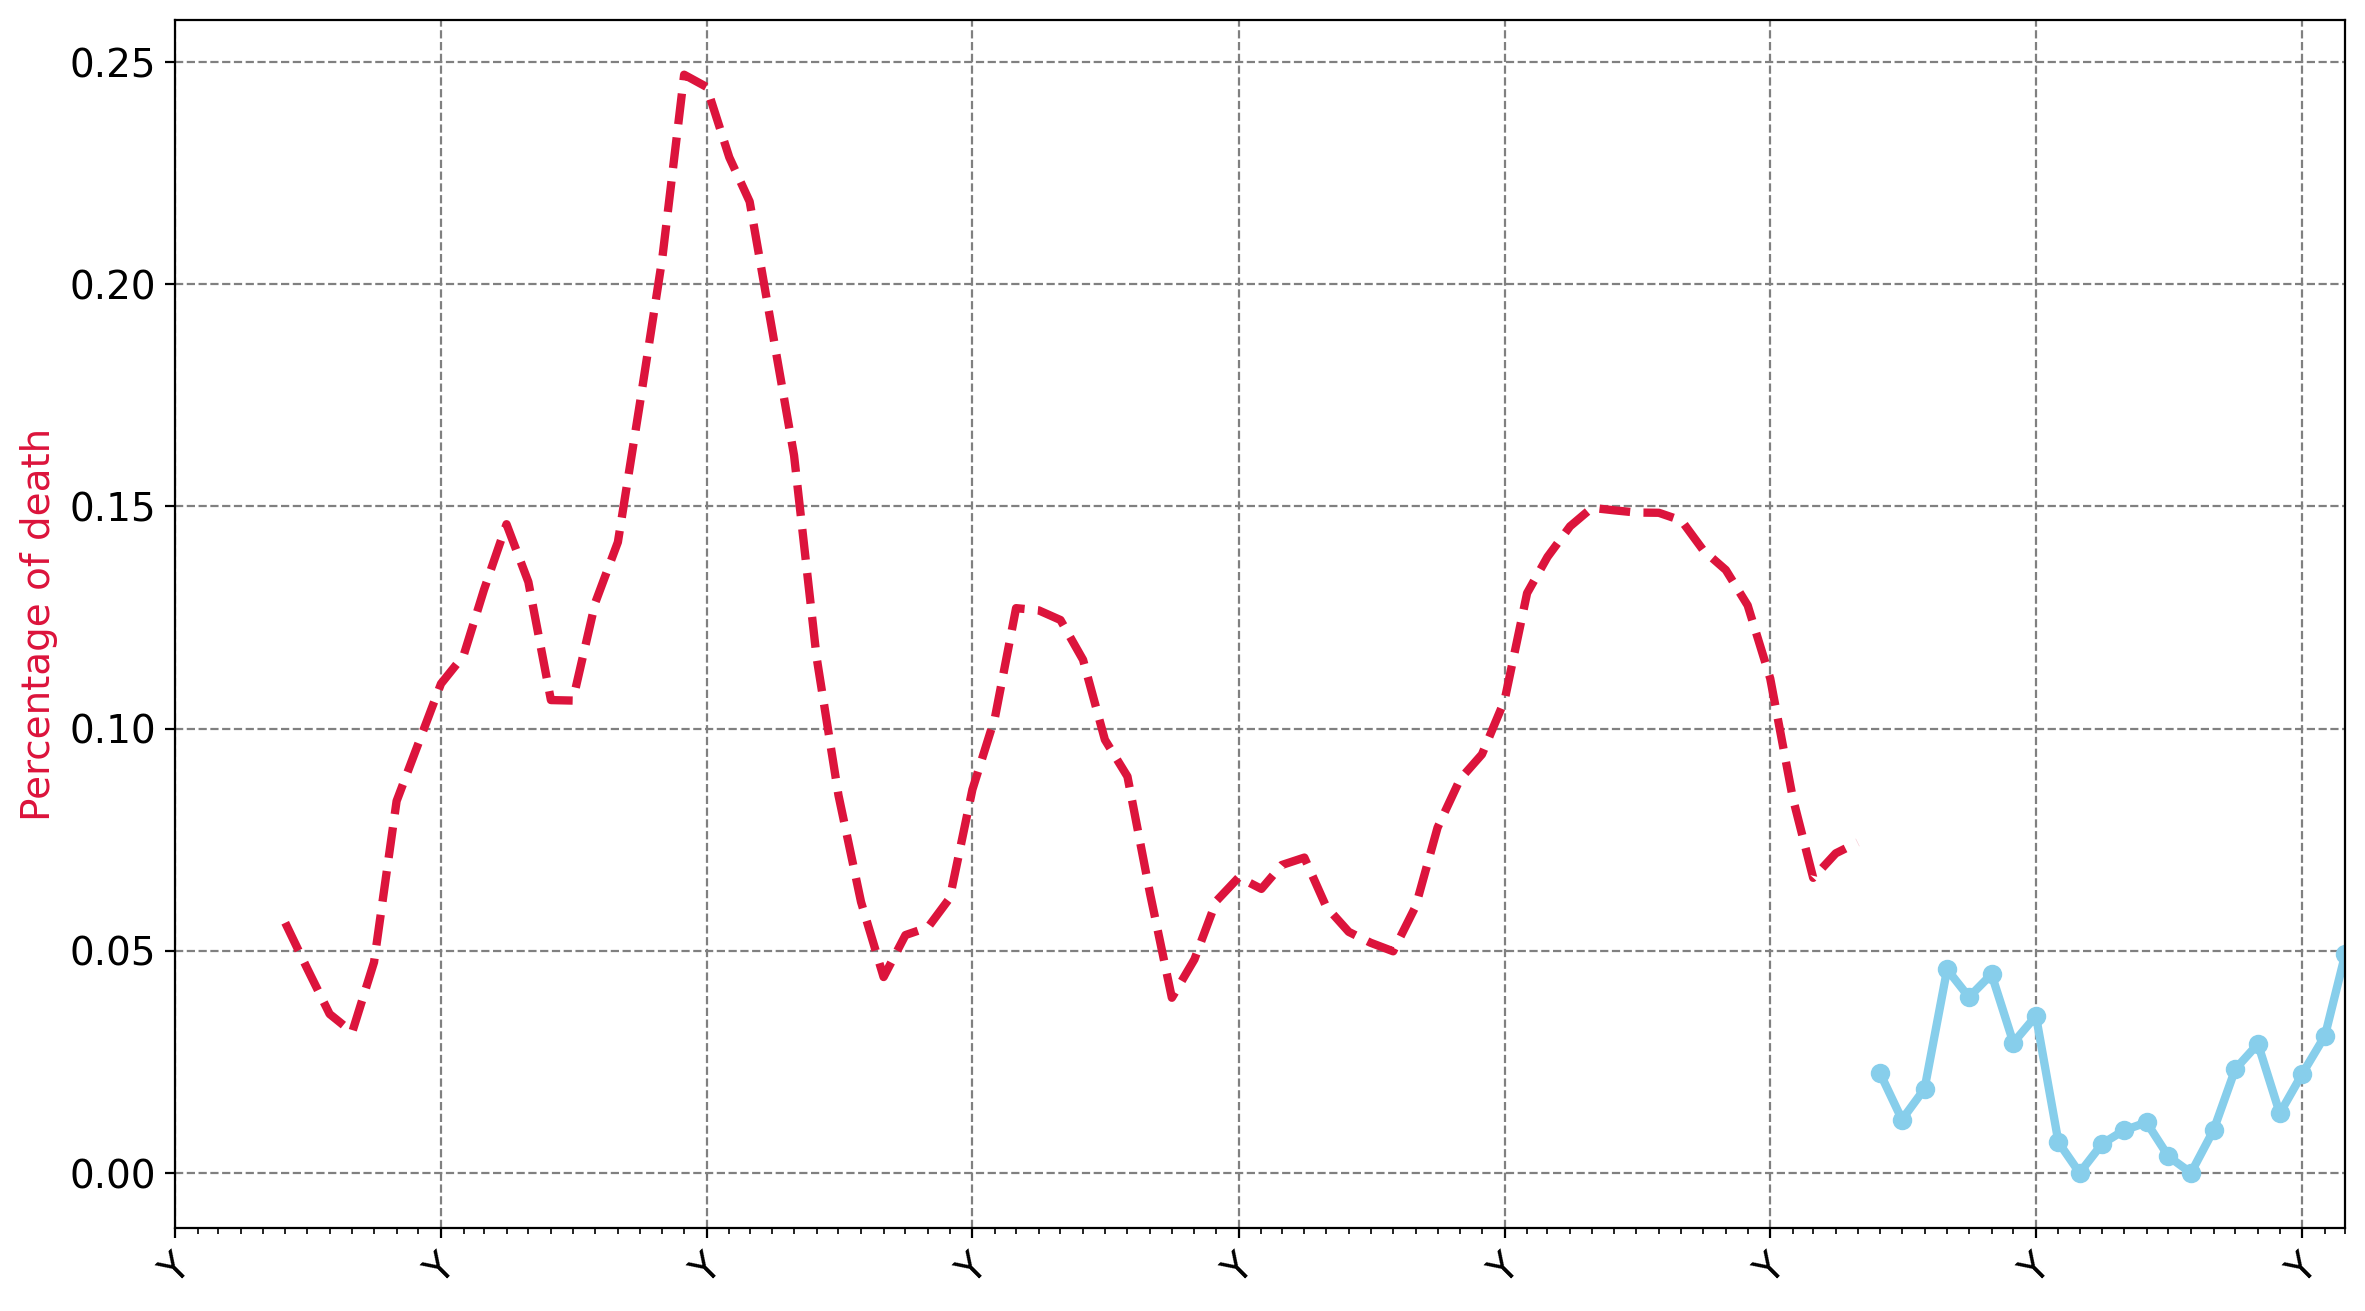

In [ ]:
# Error occur
plt.figure(figsize=(14,8),dpi=200)


plt.xticks(fontsize=14,rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('Percentage of death',fontsize=14,color='crimson')

ax1=plt.gca()


# Putiing grid line on plot
plt.grid(color='grey',linestyle='--')


# Use locator
ax1.set_xlim(df_monthly.date.min(),df_monthly.date.max())
ax1.xaxis.set_major_locator(year)
ax1.xaxis.set_major_formatter(year_fmt)
ax1.xaxis.set_minor_locator(month)

ma_line,=plt.plot(roll_df.index,
                  roll_df.pct_deaths,
                  color='crimson',
                  linewidth=3,
                  linestyle='--',
                  label='6 mon moving avg'
                  )

bw_line,=plt.plot(df_monthly_bf.date,
                  df_monthly_af.pct_deaths,
                  linewidth=1,
                  linestyle='--',
                  color='black',
                  label='before handwashing'
                  )

af_line,=plt.plot(df_monthly_af.date,
                  df_monthly_af.pct_deaths,
                  linewidth=3,
                  marker='o',
                  color='skyblue',
                  label='After handwashing'
                  )

plt.legend(Handles=[ma_line,bw_line,af_line],fontsize=18)

plt.show()

### Statistics - Calculate the Difference in the Average Monthly Death Rate

**Challenge**:
* What was the average percentage of monthly deaths before handwashing?
* What was the average percentage of monthly deaths after handwashing was made obligatory?
* By how much did handwashing reduce the average chance of dying in childbirth in percentage terms?
* How do these numbers compare to the average for all the 1840s that we calculated earlier?
* How many times lower are the chances of dying after handwashing compared to before?

In [ ]:
avg_pct_bh=df_monthly_bf.pct_deaths.mean()*100
avg_pct_ah=df_monthly_af.pct_deaths.mean()*100
print(f"Chance of death during childbirth before handwashing:{avg_pct_bh:.3} %")
print(f"Chance of death during childbirth after handwashing:{avg_pct_ah:.3}%")

Chance of death during childbirth before handwashing:10.5 %
Chance of death during childbirth after handwashing:2.11%


In [ ]:
mean_differ=avg_pct_bh - avg_pct_ah
print(f"'Handwashing reduced the monthly proportion of deaths by: {mean_differ:.3}%")
times=avg_pct_bh/avg_pct_ah
print(f"This is a {round(times)} times improvement")

'Handwashing reduced the monthly proportion of deaths by: 8.4%
This is a 5 times improvement


### Use Box Plots to Show How the Death Rate Changed Before and After Handwashing

**Challenge**:
* Use [NumPy's `.where()` function](https://numpy.org/doc/stable/reference/generated/numpy.where.html) to add a column to `df_monthly` that shows if a particular date was before or after the start of handwashing.
* Then use plotly to create box plot of the data before and after handwashing.
* How did key statistics like the mean, max, min, 1st and 3rd quartile changed as a result of the new policy?



**numpy.where**<br>
numpy.where(condition, [x, y, ])<br>
Return elements chosen from x or y depending on condition.

In [ ]:
df_monthly['washing_hand']=np.where(df_monthly.date < handwashing_start,'No','Yes')
df_monthly

,date,births,deaths,pct_deaths,washing_hand
0,1841-01-01,254,37,0.15,No
1,1841-02-01,239,18,0.08,No
2,1841-03-01,277,12,0.04,No
3,1841-04-01,255,4,0.02,No
4,1841-05-01,255,2,0.01,No
...,...,...,...,...,...
93,1848-11-01,310,9,0.03,Yes
94,1848-12-01,373,5,0.01,Yes
95,1849-01-01,403,9,0.02,Yes
96,1849-02-01,389,12,0.03,Yes


In [ ]:
# Now ploting box plot
box=px.box(df_monthly,
           x='washing_hand',
           y='pct_deaths',
           color='washing_hand',
           title='How the stats changes with washing hands'
)
box.update_layout(xaxis_title='washing_hands ?',
                  yaxis_title='Percentage of monthly deaths')
box.show()

### Use Histograms to Visualise the Monthly Distribution of Outcomes

**Challenge**: Create a [plotly histogram](https://plotly.com/python/histograms/) to show the monthly percentage of deaths.

* Use docs to check out the available parameters. Use the [`color` parameter](https://plotly.github.io/plotly.py-docs/generated/plotly.express.histogram.html) to display two overlapping histograms.
* The time period of handwashing is shorter than not handwashing. Change `histnorm` to `percent` to make the time periods comparable.
* Make the histograms slighlty transparent
* Experiment with the number of bins on the histogram. Which number work well in communicating the range of outcomes?
* Just for fun, display your box plot on the top of the histogram using the `marginal` parameter.

In [ ]:
hist=px.histogram(df_monthly,
                  x='pct_deaths',
                  color='washing_hand',
                  histnorm='percent', # See documentation (literally did not understand.)
                  barmode='overlay', # barmode='group'/'overlay'/'relative'.
                  opacity=0.6, #opacity (float) – Value between 0 and 1
                  marginal='box', # marginal='rug'/'box'/'violin'/'histogram'. If set, a subplot is drawn alongside the main plot, visualizing the distribution.
                  nbins=30 # Positive integer. Sets the number of bins.
                )

hist.update_layout(xaxis_title='Proportion of Monthly Deaths',
                   yaxis_title='Count',)

hist.show()

### Use a Kernel Density Estimate (KDE) to visualise a smooth distribution

**Challenge**: Use [Seaborn's `.kdeplot()`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) to create two kernel density estimates of the `pct_deaths`, one for before handwashing and one for after.

* Use the `shade` parameter to give your two distributions different colours.
* What weakness in the chart do you see when you just use the default parameters?
* Use the `clip` parameter to address the problem.


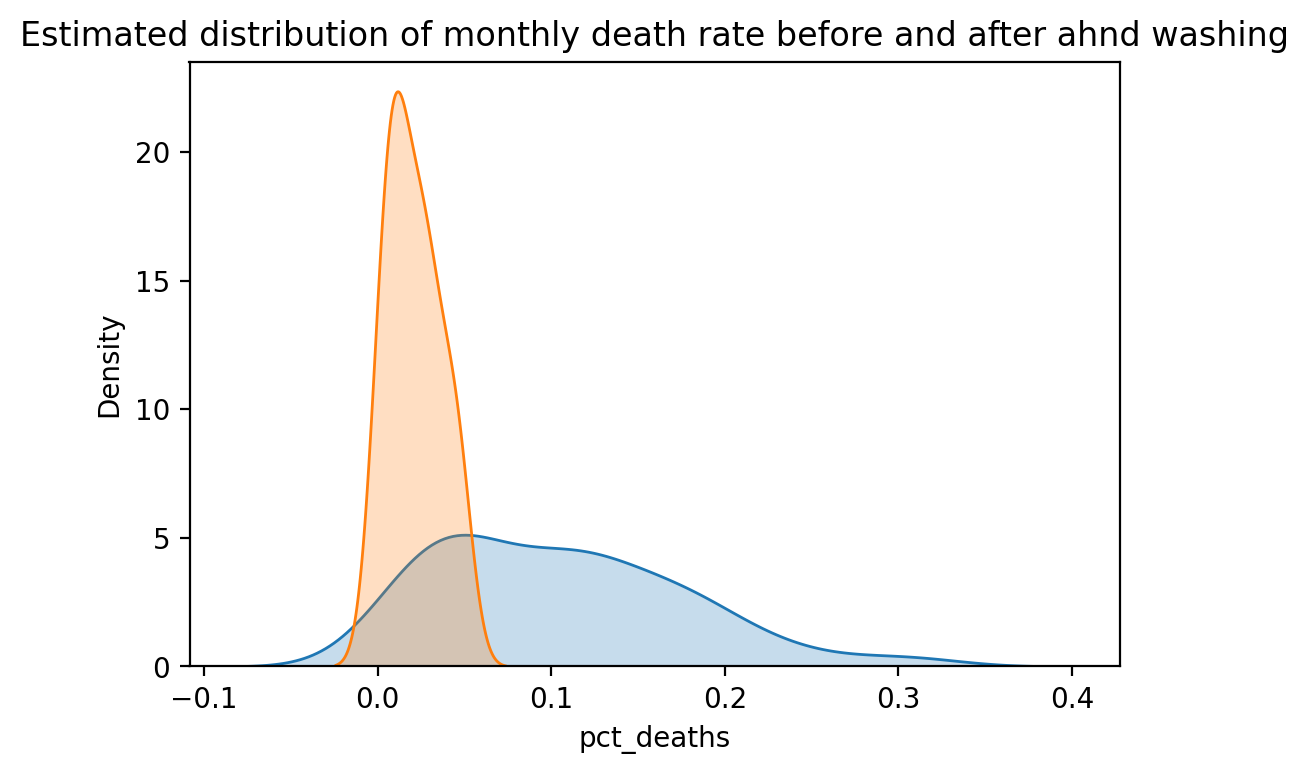

In [ ]:
plt.figure(dpi=200)
sns.kdeplot(df_monthly_bf.pct_deaths,
            shade=True,
            )
sns.kdeplot(df_monthly_af.pct_deaths,shade=True)
plt.title('Estimated distribution of monthly death rate before and after ahnd washing')
plt.show()
# Here we see death rate goes in negative which is not possible Do not evaluate the density outside of these limits.

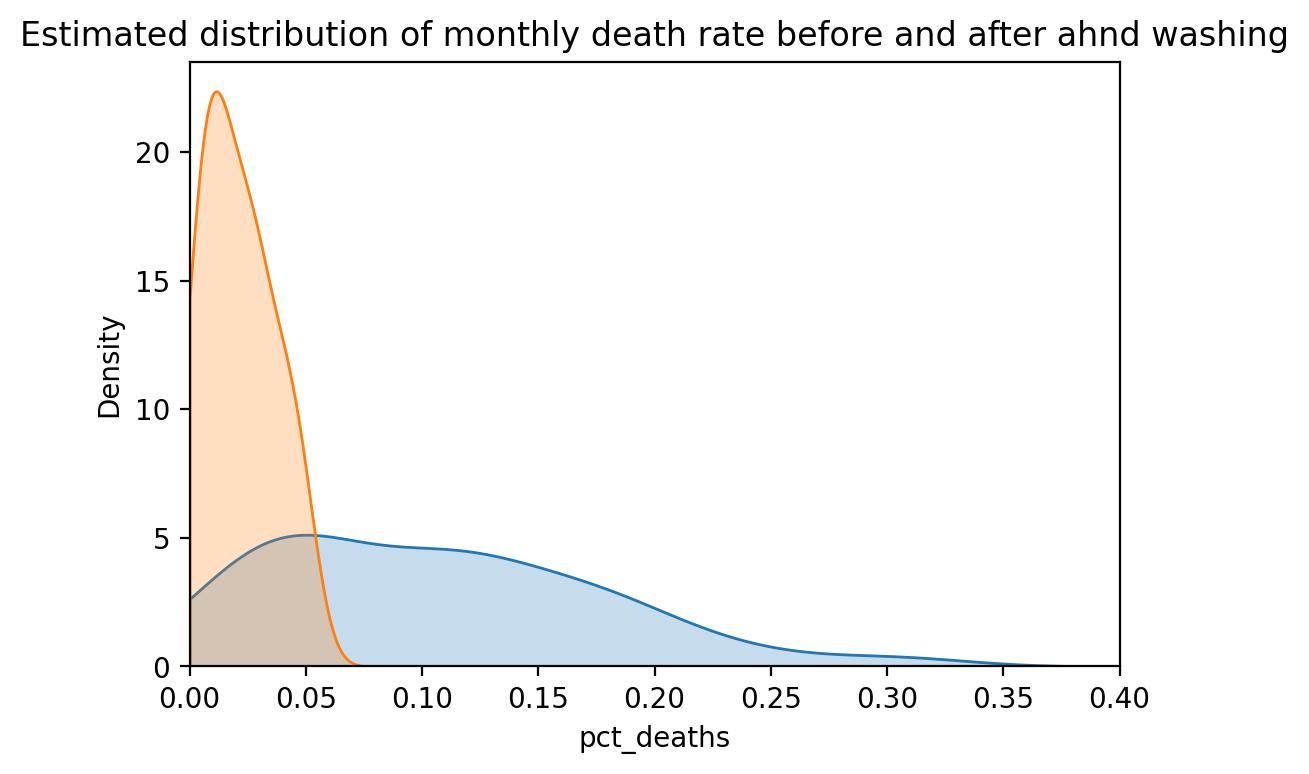

In [ ]:

plt.figure(dpi=200)
sns.kdeplot(df_monthly_bf.pct_deaths,
            shade=True, # Use shade equals to true to give two distribution different color.
            clip=(0,1) # Do not evaluate the density outside of these limits.
            )
sns.kdeplot(df_monthly_af.pct_deaths,shade=True,clip=(0,1))
plt.title('Estimated distribution of monthly death rate before and after ahnd washing')
plt.xlim(0,0.4) # Just providing limit on x scale.
plt.show()

### Use a T-Test to Show Statistical Significance

**Challenge**: Use a t-test to determine if the differences in the means are statistically significant or purely due to chance.

If the p-value is less than 1% then we can be 99% certain that handwashing has made a difference to the average monthly death rate.

* Import `stats` from scipy
* Use the [`.ttest_ind()` function](https://docs.scipy.org/]doc/scipy/reference/generated/scipy.stats.ttest_ind.html) to calculate the t-statistic and the p-value
* Is the difference in the average proportion of monthly deaths statistically significant at the 99% level?



In [ ]:
# sir ke uper se gya ye to 🤣😂

What do you conclude from your analysis, Doctor? 😊

<img src=https://i.imgur.com/rvjNVzQ.gif>